In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

## Clone GitHithub repository

In [ ]:
!git config --global user.email ericsun42@outlook.com
!git config --global user.name Erostrate9
!mkdir -p /root/.ssh && cp -r "/content/drive/My Drive/ssh/." /root/.ssh/
!ssh -T git@github.com


In [ ]:
!git clone -b eric git@github.com:Erostrate9/Robust-MSCN.git

Cloning into 'Robust-MSCN'...
remote: Enumerating objects: 15286, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15286 (delta 93), reused 131 (delta 79), pack-reused 15125 (from 1)
Receiving objects: 100% (15286/15286), 148.69 MiB | 8.44 MiB/s, done.
Resolving deltas: 100% (2520/2520), done.


In [ ]:
%%bash
cd /content/Robust-MSCN
cp "/content/drive/MyDrive/Colab Notebooks/Robust-MSCN.ipynb" Robust-MSCN.ipynb
git add .
git commit -m "Update notebook"
git push origin eric

[eric d90baea] Update notebook
 4 files changed, 8 insertions(+), 5 deletions(-)
 rewrite Robust-MSCN.ipynb (65%)


To github.com:Erostrate9/Robust-MSCN.git
   5e60cd9..d90baea  eric -> eric


In [ ]:
%%bash
# old version
mkdir updates
cd updates
git clone -b updates git@github.com:Erostrate9/Robust-MSCN.git

Cloning into 'Robust-MSCN'...


In [ ]:
%%bash
cd /content/updates/Robust-MSCN
cp "/content/drive/MyDrive/Colab Notebooks/Robust-MSCN.ipynb" Robust-MSCN.ipynb
git add .
git commit -m "Update configs"
git push origin updates

# Install Enviroment

In [ ]:
%%bash
cd /content/Robust-MSCN
pip install -r requirements.txt
pip install klepto
apt-get update
apt-get install -y libomp5 libomp-dev
ln -s /usr/lib/llvm-14/lib/libomp.so /usr/lib/x86_64-linux-gnu/libomp.so
ls /usr/lib/x86_64-linux-gnu/libomp.so
# Optional For some of the plan graph visualizations
apt-get install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cra

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


## Download workload queries (dataset)
Note: there're some typos in downloading scripts. They didn't download the imdb_data.json correctly. We have to correct download_imdb_workload.sh, download_job_workload.sh and download_imdb_updates.sh:
```bash
## downloading data about imdb schema etc.
wget -O imdb_data.json https://www.dropbox.com/s/nxtt17s4gdt21r5/imdb_data.json?dl=1
cp imdb_data.json queries/ceb-imdb-full/dbdata.json

```

In [ ]:
%%bash
# download IMDB workload
cd Robust-MSCN
bash scripts/download_imdb_workload.sh

Output hidden; open in https://colab.research.google.com to view.

## PostgreSQL Configuration

- We use docker to install and configure PostgreSQL, and setup the relevant databases.

- Make sure that you have Docker installed appropriately for your system, with the docker daemon running.
- PostgreSQL requires a username, which we copy from an environement variable \$LCARD_USER while setting it up in docker. Similarly, set \$LCARD_PORT to the local port you want to use to connect to the PostgreSQL instance running in docker. Here are the commands to set it up:

- You cannot run docker daemon on Colab (at least not on the free version). Therefore, I recommend running docker locall

- You can run the following bash on your local environment (e.g., Mac) to build the docker image
```bash
cd docker
export LCARD_USER=imdb
export LCARD_PORT=5432
docker build --build-arg LCARD_USER=imdb -t pg12 .
docker save -o pg12.tar pg12
docker run -itd --shm-size=1g --name card-db -p 5432:5432 -d pg12
docker restart card-db
docker exec -it card-db /imdb_setup.sh
```
- Alternatively, you can use image that I uploaded:
```bash
docker pull erostrate9/pg12:latest
```


- To build Docker image on Mac, you need to add the clang dependency in Dockfile.

```
RUN apt-get update && apt-get install -y \
    clang \
    wget \
    tar \
    git \
    gcc \
    build-essential \
    postgresql-server-dev-12
```

```
# if your instance gets restarted / docker image gets shutdown
sudo docker restart card-db

# get a bash shell within the docker image
sudo docker exec -it card-db bash
# note that postgresql data on docker is stored at /var/lib/postgresql/data

# If you failed to run `docker exec -it card-db /imdb_setup.sh`
/imdb_setup.sh



# connect psql on your host to the postgresql server running on docker
psql -d imdb -h localhost -U ceb
```


### Colab: Runnning Postgres without docker

In [ ]:
!sudo apt install dirmngr ca-certificates software-properties-common gnupg gnupg2 apt-transport-https curl -y
!curl -fSsL https://www.postgresql.org/media/keys/ACCC4CF8.asc | gpg --dearmor | sudo tee /usr/share/keyrings/postgresql.gpg > /dev/null
!echo 'deb [arch=amd64,arm64,ppc64el signed-by=/usr/share/keyrings/postgresql.gpg] http://apt.postgresql.org/pub/repos/apt/ jammy-pgdg main' | sudo tee /etc/apt/sources.list.d/pgdg.list
!sudo apt update
!sudo apt install postgresql-client-12 postgresql-12 -y
!sudo apt install postgresql-server-dev-12
!sudo service postgresql start

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
curl is already the newest version (7.81.0-1ubuntu1.17).
dirmngr is already the newest version (2.2.27-3ubuntu2.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
software-properties-common is already the newest version (0.99.22.9).
gnupg2 is already the newest version (2.2.27-3ubuntu2.1).
The following NEW packages will be installed:
  apt-transport-https
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 1,510 B of archives.
After this operation, 170 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 apt-transport-https all 2.4.12 [1,510 B]
Fetched 1,510 B in 1s (2,255 B/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based

In [ ]:
%%bash
git clone -b update https://github.com/parimarjan/pg_hint_plan.git
cd pg_hint_plan
make
make install
sudo service postgresql restart

gcc -Wall -Wmissing-prototypes -Wpointer-arith -Wdeclaration-after-statement -Werror=vla -Wendif-labels -Wmissing-format-attribute -Wformat-security -fno-strict-aliasing -fwrapv -fexcess-precision=standard -Wno-format-truncation -Wno-stringop-truncation -g -g -O2 -flto=auto -ffat-lto-objects -flto=auto -ffat-lto-objects -fstack-protector-strong -Wformat -Werror=format-security -fno-omit-frame-pointer -fPIC -I. -I./ -I/usr/include/postgresql/12/server -I/usr/include/postgresql/internal  -Wdate-time -D_FORTIFY_SOURCE=2 -D_GNU_SOURCE -I/usr/include/libxml2   -c -o pg_hint_plan.o pg_hint_plan.c
gcc -Wall -Wmissing-prototypes -Wpointer-arith -Wdeclaration-after-statement -Werror=vla -Wendif-labels -Wmissing-format-attribute -Wformat-security -fno-strict-aliasing -fwrapv -fexcess-precision=standard -Wno-format-truncation -Wno-stringop-truncation -g -g -O2 -flto=auto -ffat-lto-objects -flto=auto -ffat-lto-objects -fstack-protector-strong -Wformat -Werror=format-security -fno-omit-frame-pointe

Cloning into 'pg_hint_plan'...


In [ ]:
%%bash
export LCARD_USER=imdb
export LCARD_PORT=5432
export POSTGRES_USER=imdb

createdb -U imdb imdb
wget -O /var/lib/postgresql/pg_imdb.tar https://www.dropbox.com/s/vq1owleo9nuyxdf/pg_imdb.tar.gz?dl=1
tar xf /var/lib/postgresql/pg_imdb.tar -C /var/lib/postgresql/
ls /var/lib/postgresql/pg_imdb

2302.dat.gz
2303.dat.gz
2304.dat.gz
2305.dat.gz
2306.dat.gz
2307.dat.gz
2308.dat.gz
2309.dat.gz
2310.dat.gz
2311.dat.gz
2312.dat.gz
2313.dat.gz
2314.dat.gz
2315.dat.gz
2316.dat.gz
2317.dat.gz
2318.dat.gz
2319.dat.gz
2320.dat.gz
2321.dat.gz
2322.dat.gz
toc.dat


createdb: error: could not connect to database template1: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: FATAL:  Peer authentication failed for user "imdb"
--2024-08-28 21:39:39--  https://www.dropbox.com/s/vq1owleo9nuyxdf/pg_imdb.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/vq1owleo9nuyxdf/pg_imdb.tar.gz [following]
--2024-08-28 21:39:40--  https://www.dropbox.com/s/dl/vq1owleo9nuyxdf/pg_imdb.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca1f76a0e1501d52642a39b022b.dl.dropboxusercontent.com/cd/0/get/CZiTNda4E_iqpz3uiqr5_0VvaqS-hPAWW_f1hSo6mX8qLOx-OMi_95uk0TBNrAA1od7LW1jQcRpYSS5GjIMJDRd6Tpz0Iyni39fRJaA35WBjERf1mAtl924tq2jBp3psqyI5a38jTrBD-aJZjdnp1aYl/file?dl=1# [following]
--20

In [ ]:
!rm /var/lib/postgresql/pg_imdb.tar

In [ ]:
!sudo -u postgres psql -U postgres -c "CREATE ROLE root WITH SUPERUSER LOGIN;"
!sudo -u postgres psql -U postgres -c "CREATE ROLE imdb WITH SUPERUSER LOGIN;"
!sudo -u postgres psql -U postgres -c "CREATE ROLE ceb WITH SUPERUSER LOGIN;"
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS imdb;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE imdb;'
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'password';"
!sudo -u postgres psql -U postgres -c "ALTER USER root PASSWORD 'password';"
!sudo -u postgres psql -U postgres -c "ALTER USER imdb PASSWORD 'password';"
!sudo -u postgres psql -U postgres -c "ALTER USER ceb PASSWORD 'password';

!pg_restore -v -d imdb /var/lib/postgresql/pg_imdb

CREATE ROLE
CREATE ROLE
CREATE ROLE
NOTICE:  database "imdb" does not exist, skipping
DROP DATABASE
CREATE DATABASE
ALTER ROLE
ALTER ROLE
ALTER ROLE
/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file
pg_restore: connecting to database for restore
pg_restore: creating SCHEMA "public"
pg_restore: while PROCESSING TOC:
pg_restore: from TOC entry 3; 2615 2200 SCHEMA public postgres
pg_restore: error: could not execute query: ERROR:  schema "public" already exists
Command was: CREATE SCHEMA public;


pg_restore: creating COMMENT "SCHEMA public"
pg_restore: creating EXTENSION "plpgsql"
pg_restore: creating COMMENT "EXTENSION plpgsql"
pg_restore: creating TABLE "public.aka_name"
pg_restore: creating TABLE "public.aka_title"
pg_restore: creating TABLE "public.cast_info"
pg_restore: creating TABLE "public.char_name"
pg_restore: creating TABLE "public.comp_cast_type"
pg_restore: creating TABLE "public.company_name"
pg_

In [ ]:
!pg_restore -v -d imdb /var/lib/postgresql/pg_imdb

pg_restore: connecting to database for restore
pg_restore: creating SCHEMA "public"
pg_restore: while PROCESSING TOC:
pg_restore: from TOC entry 3; 2615 2200 SCHEMA public postgres
pg_restore: error: could not execute query: ERROR:  schema "public" already exists
Command was: CREATE SCHEMA public;


pg_restore: creating COMMENT "SCHEMA public"
pg_restore: creating EXTENSION "plpgsql"
pg_restore: creating COMMENT "EXTENSION plpgsql"
pg_restore: creating TABLE "public.aka_name"
pg_restore: from TOC entry 196; 1259 16386 TABLE aka_name imdb
pg_restore: error: could not execute query: ERROR:  relation "aka_name" already exists
Command was: CREATE TABLE aka_name (
    id integer NOT NULL,
    person_id integer NOT NULL,
    name character varying,
    imdb_index character varying(3),
    name_pcode_cf character varying(11),
    name_pcode_nf character varying(11),
    surname_pcode character varying(11),
    md5sum character varying(65)
);


pg_restore: creating TABLE "public.aka_title"
pg_

### Colab udocker (not recommend)
It doesn't work. Please run docker locally.

In [ ]:
# Copyright 2024 Drengskapur
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# @title {display-mode:"form"}
# @markdown <br/><br/><center><img src="https://cdn.jsdelivr.net/gh/drengskapur/docker-in-colab/assets/docker.svg" height="150"><img src="https://cdn.jsdelivr.net/gh/drengskapur/docker-in-colab/assets/colab.svg" height="150"></center><br/>
# @markdown <center><h1>Docker in Colab</h1></center><center>github.com/drengskapur/docker-in-colab<br/><br/><br/><b>udocker("run hello-world")</b></center><br/>
def udocker_init():
    import os
    if not os.path.exists("/home/user"):
        !pip install udocker > /dev/null
        !udocker --allow-root install > /dev/null
        !useradd -m user > /dev/null
    print(f'Docker-in-Colab 1.1.0\n')
    print(f'Usage:     udocker("--help")')
    print(f'Examples:  https://github.com/indigo-dc/udocker?tab=readme-ov-file#examples')

    def execute(command: str):
        user_prompt = "\033[1;32muser@pc\033[0m"
        print(f"{user_prompt}$ udocker {command}")
        !su - user -c "udocker $command"

    return execute

udocker = udocker_init()

In [ ]:
%%bash
cd Robust-MSCN/docker
export LCARD_USER=ceb
export LCARD_PORT=5432

In [ ]:
%%bash
udocker --allow-root pull erostrate9/pg12
udocker --allow-root create erostrate9/pg12
udocker --allow-root run erostrate9/pg12 /imdb_setup.sh

Info: downloading layer sha256:3163723c92e82e79f9a524cc925b58e4161f852474a4c375a9d1615343aa7789
Info: downloading layer sha256:7669119a765bdb3be269e80a1ad736abba05b9a8c19cc685502c964b918f5d01
Info: downloading layer sha256:102297bcba73fb6f48819877fe48edc8df0abe2d83bc7d05d35eff3d7e161b70
Info: downloading layer sha256:99821d3cfbb1637ae9cf1c9c41b942ad446a77e626af3b9b300bf0ade590c743
Info: downloading layer sha256:a663d58bba88684270f42bc69e48ca8a819ae3f932ef2427022472206a6d83ef
Info: downloading layer sha256:f96bbdeada86328b8c7fba5e8e7e556b31b29a7136dbde2830bbca6ca2922db6
Info: downloading layer sha256:82f03eefbc068c2b372a4db4c6faf91d7d28af03bbf8cde104f1ee9bd1ec90a1
Info: downloading layer sha256:009516957a9037a7ad8c01c4e267f369aee378fbbfe1fd1240d349b298f99ad2
Info: downloading layer sha256:af34b4497e5a2b2857e3eef07171510152efd8c8cd82763646fa8641df785315
Info: downloading layer sha256:4913375850dfb45862524e6b8ac9cc49d042d5d96f1bc339b6827883a516de89
Info: downloading layer sha256:7391f377f

CalledProcessError: Command 'b'udocker --allow-root pull erostrate9/pg12\nudocker --allow-root create erostrate9/pg12\nudocker --allow-root run erostrate9/pg12 /imdb_setup.sh\n'' returned non-zero exit status 255.

# Background
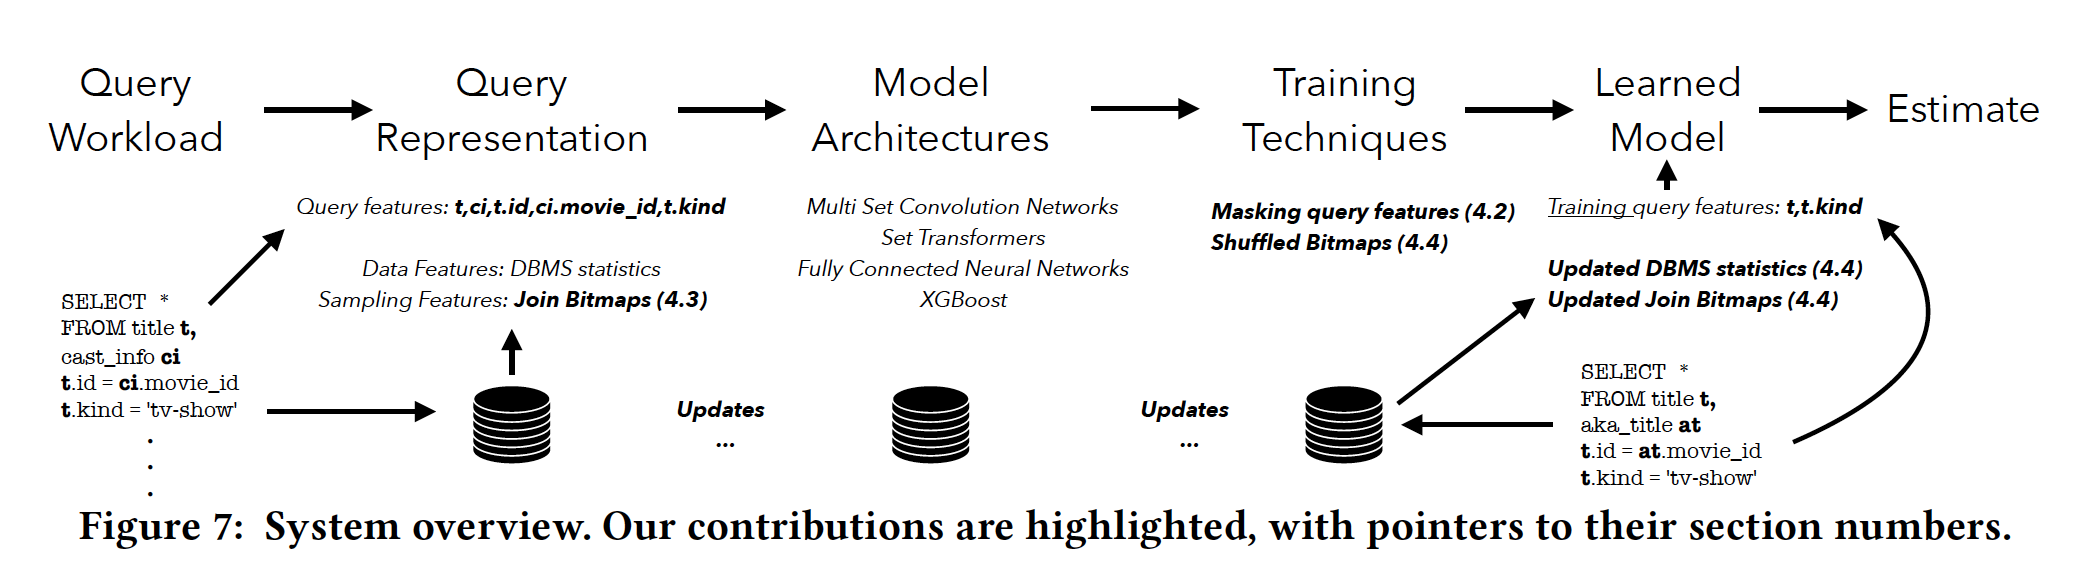

## Query Masking


## Join Bitmaps

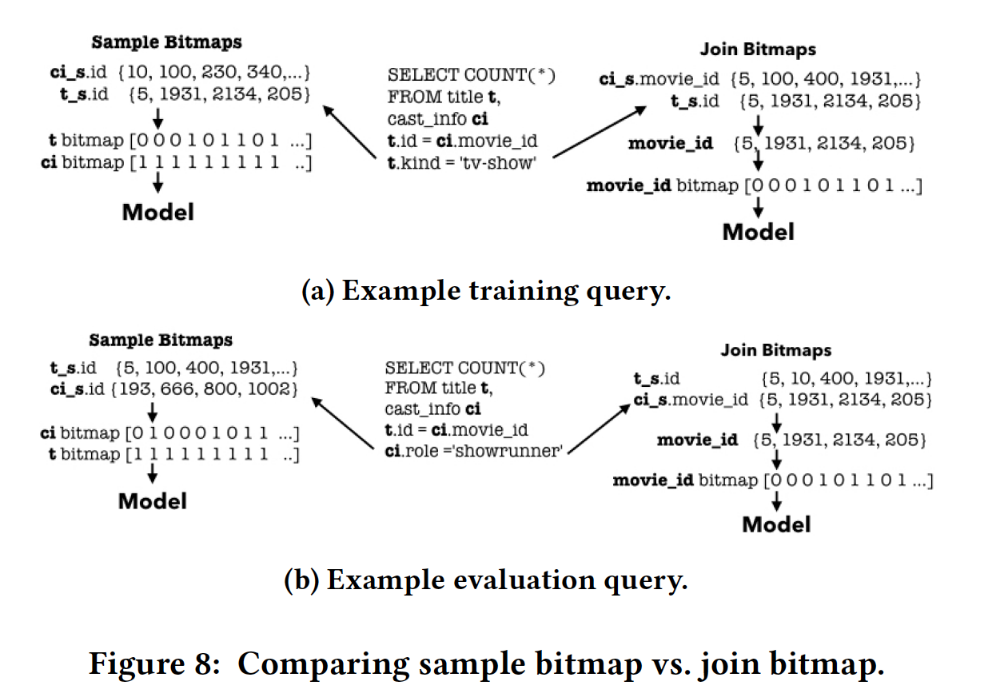

# Details

## Query Format
- First, let us explore the basic properties of the queries that we store:
- Each folder in queries/ is a workload that consists of pkl files. Each pkl file store a single query.
  - e.g., in `queries/joblight_train/joblight-train-all/0.pkl`
  ```
Query has 3 tables, 2 joins, 6 subplans.
Tables:
title t
movie_companies mc
movie_info mi
Joins:
t.id = mc.movie_id
t.id = mi.movie_id
Predicates:
t.production_year>1977
     Predicate column:  t.production_year
       Predicate type:  lt
     Predicate values:  [1977, None]
mc.company_id>71403
     Predicate column:  mc.company_id
       Predicate type:  lt
     Predicate values:  [71403, None]
mi.info_type_id<4
     Predicate column:  mi.info_type_id
       Predicate type:  lt
     Predicate values:  [None, 4]
  ```

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/content/Robust-MSCN')
print('/content/Robust-MSCN' in sys.path)
import os
import numpy as np
import pandas as pd

from cardinality_estimation.featurizer import Featurizer

import glob
import random
import os
import json
import time
from collections import defaultdict

from IPython.display import HTML
from IPython.display import display_html
os.chdir('/content/Robust-MSCN')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
True


In [ ]:
from query_representation.query import *

qfn = "queries/joblight_train/joblight-train-all/0.pkl"
qrep = load_qrep(qfn)

# extract basic properties of the query representation format

print("""Query has {} tables, {} joins, {} subplans.""".format(
    len(qrep["join_graph"].nodes()), len(qrep["join_graph"].edges()),
    len(qrep["subset_graph"].nodes())))

tables, aliases = get_tables(qrep)

print("Tables: ")
for i,table in enumerate(tables):
    print(table, aliases[i])

print("Joins: ")
joins = get_joins(qrep)
print(("\n").join(joins))

preds, pred_cols, pred_types, pred_vals = get_predicates(qrep)
print("Predicates: ")
for i in range(len(preds)):
    for j, pred in enumerate(preds[i]):
        print(pred.strip(" "))
        print("     Predicate column: ", pred_cols[i][j])
        print("       Predicate type: ", pred_types[i][j])
        print("     Predicate values: ", pred_vals[i][j])

Query has 3 tables, 2 joins, 6 subplans.
Tables: 
title t
movie_companies mc
movie_info mi
Joins: 
t.id = mc.movie_id
t.id = mi.movie_id
Predicates: 
t.production_year>1977
     Predicate column:  t.production_year
       Predicate type:  lt
     Predicate values:  [1977, None]
mc.company_id>71403
     Predicate column:  mc.company_id
       Predicate type:  lt
     Predicate values:  [71403, None]
mi.info_type_id<4
     Predicate column:  mi.info_type_id
       Predicate type:  lt
     Predicate values:  [None, 4]


Next, we see how to access each of the subplans, and their cardinality estimates.

In [ ]:
import os
os.chdir('/content/Robust-MSCN')
from query_representation.query import *
from query_representation.utils import *
qfn = "queries/joblight_train/joblight-train-all/0.pkl"
qrep = load_qrep(qfn)

# for getting cardinality estimates of every subplan in the query
ests = get_postgres_cardinalities(qrep)
trues = get_true_cardinalities(qrep)

for k,v in ests.items():
    print("Subplan, joining tables: ", k)
    subsql = subplan_to_sql(qrep, k)
    print("Subplan SQL: ", subsql)
    print("   True cardinality: ", trues[k])
    print("PostgreSQL estimate: ", v)
    print("****************")

Subplan, joining tables:  ('t',)
Subplan SQL:  SELECT COUNT(*) FROM title AS t WHERE  t.production_year>1977
   True cardinality:  1976617
PostgreSQL estimate:  821888
****************
Subplan, joining tables:  ('mc',)
Subplan SQL:  SELECT COUNT(*) FROM movie_companies AS mc WHERE  mc.company_id>71403
   True cardinality:  568886
PostgreSQL estimate:  237434
****************
Subplan, joining tables:  ('mi',)
Subplan SQL:  SELECT COUNT(*) FROM movie_info AS mi WHERE  mi.info_type_id<4
   True cardinality:  3624977
PostgreSQL estimate:  1515967
****************
Subplan, joining tables:  ('mc', 't')
Subplan SQL:  SELECT COUNT(*) FROM movie_companies AS mc , title AS t WHERE  mc.company_id>71403 AND  t.production_year>1977 AND t.id = mc.movie_id
   True cardinality:  412564
PostgreSQL estimate:  185227
****************
Subplan, joining tables:  ('mi', 't')
Subplan SQL:  SELECT COUNT(*) FROM movie_info AS mi , title AS t WHERE  mi.info_type_id<4 AND  t.production_year>1977 AND t.id = mi.mov

In [ ]:
'''
  @ests: dict; key: label of the subplan. value: PostgreSQL cardinality estimate.
'''
ests

{('t',): 821888,
 ('mc',): 237434,
 ('mi',): 1515967,
 ('mc', 't'): 185227,
 ('mi', 't'): 1182635,
 ('mc', 'mi', 't'): 1323970}

## Evaluating estimates
Given a query, and estimates for each of its subplans, we can use various error functions to evaluate how good the estimates are. We can directly compare the true values and the estimated values, using for instance:

Q-Error, Relative Error, Absolute Error etc. Q-Error is generally considered to be the most useful of these metrics from the perspective of query-optimization.
Alternatively, we can compare how good was the plan generated by using the estimated values. This will depend on the query optimizer - in particular the properties of the cost model we choose, and the search function etc. We provide implementations for the two options as discussed in the paper, but by changing configurations of the PostgreSQL cost model, or adding more complex custom cost models, there can be many possibilities considered here.

Postgres Plan Cost (PPC): this uses the PostgreSQL cost model with two restrictions --- no materialization and parallelism. For experimenting with different configurations, check the function set_cost_model in losses/plan_loss.py and add additional configurations.

Plan-Cost: this considers only left deep plans, and uses a simple user specified cost function (referred to as C in the paper).

Here is a self contained example showing the API to compute these different kind of errors on a single query.

In [ ]:
from os.path import dirname, join, realpath
import sys
sys.path.append('/content/Robust-MSCN')
import os
os.chdir('/content/Robust-MSCN')
import query_representation
from query_representation.query import *
from evaluation.eval_fns import *
from psycopg2 import OperationalError

qfn = join(dirname(realpath(query_representation.__path__._path[0])), "queries/joblight_train/joblight-train-all/0.pkl")
qrep = load_qrep(qfn)
ests = get_postgres_cardinalities(qrep)

# estimation errors for each subplan in the query
qerr_fn = get_eval_fn("qerr")
abs_fn = get_eval_fn("abs")
rel_fn = get_eval_fn("rel")

qerr = qerr_fn.eval([qrep], [ests], result_dir=None)
abs_err = abs_fn.eval([qrep], [ests], result_dir=None)
relerr = rel_fn.eval([qrep], [ests],result_dir=None)

print("avg q-error: {}, avg abs-error: {}, avg relative error: {}".format(
              np.round(np.mean(qerr),2), np.round(np.mean(abs_err), 2),
                            np.round(np.mean(relerr), 2)))

# check the function comments to see the description of the arguments
# can change the db arguments appropriately depending on the PostgreSQL
# installation.
ppc = get_eval_fn("ppc")
port = 5432
# try:
ppc = ppc.eval([qrep], [ests], user="imdb", pwd="password", db_name="imdb",
        db_host="localhost", port=port, num_processes=-1, result_dir=None,
        cost_model="cm1")
# except OperationalError:
#     print(f"PGSQL not running at port {port}")
#     pass

# we considered only one query, so the returned lists have just one element
print("PPC is: {}".format(np.round(ppc[0])))

pc = get_eval_fn("plancost")
plan_cost = pc.eval([qrep], [ests], cost_model="C")
print("Plan-Cost is: {}".format(np.round(plan_cost[0])))

avg q-error: 2.13, avg abs-error: 901816.17, avg relative error: 0.5
PPC is: 867303.0
, #samples: 1, Relative Plan Cost: 1.0
Plan-Cost is: 987052.0


### old version

For evaluating either true cardinalities, or PostgreSQL estimates on all queries in CEB / or just from some templates, checkout the updates branch and run:

In [ ]:
!apt install build-essential
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install --channel defaults conda --yes
!conda update --channel defaults --all --yes
!conda create --name ceb "python=3.9"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
--2024-08-26 18:55:42--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148981743 (142M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.1’

Miniconda3-latest-L 100%[===================>] 142.08M   437MB/s    in 0.3s    

2024-08-26 18:55:42 (437 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh.1’ saved [148981743/148981743]

PREFIX=/usr/local
Unpacking payload ...
^C
Channels:
 - defaults
Platform: linux-64
Solving environment: - \ done

# All requested packages already installe

In [ ]:
%%bash
cd updates/Robust-MSCN
source activate ceb
pip install -r requirements.txt
pip install ipykernel

In [ ]:
%%bash
cd updates/Robust-MSCN
bash /content/updates/Robust-MSCN/scripts/download_job_workloads.sh

job/
job/all_job/
job/all_job/7a.pkl
job/all_job/6f.pkl
job/all_job/27b.pkl
job/all_job/4b.pkl
job/all_job/16c.pkl
job/all_job/20b.pkl
job/all_job/17b.pkl
job/all_job/26c.pkl
job/all_job/13d.pkl
job/all_job/12c.pkl
job/all_job/25c.pkl
job/all_job/22b.pkl
job/all_job/7b.pkl
job/all_job/2b.pkl
job/all_job/19c.pkl
job/all_job/26a.pkl
job/all_job/11c.pkl
job/all_job/9b.pkl
job/all_job/32b.pkl
job/all_job/14c.pkl
job/all_job/31a.pkl
job/all_job/23b.pkl
job/all_job/27a.pkl
job/all_job/30c.pkl
job/all_job/33c.pkl
job/all_job/15b.pkl
job/all_job/18a.pkl
job/all_job/10c.pkl
job/all_job/16a.pkl
job/all_job/2d.pkl
job/all_job/31b.pkl
job/all_job/24a.pkl
job/all_job/14a.pkl
job/all_job/3c.pkl
job/all_job/21b.pkl
job/all_job/10b.pkl
job/all_job/13c.pkl
job/all_job/31c.pkl
job/all_job/22d.pkl
job/all_job/12b.pkl
job/all_job/4c.pkl
job/all_job/6d.pkl
job/all_job/19d.pkl
job/all_job/8a.pkl
job/all_job/22c.pkl
job/all_job/29a.pkl
job/all_job/3a.pkl
job/all_job/4a.pkl
job/all_job/5a.pkl
job/all_job/9a.p

bash: line 1: cd: updates/Robust-MSCN: No such file or directory
--2024-08-26 19:04:45--  https://www.dropbox.com/s/i2tphhwv1u4o26k/job.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/i2tphhwv1u4o26k/job.tar.gz [following]
--2024-08-26 19:04:46--  https://www.dropbox.com/s/dl/i2tphhwv1u4o26k/job.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5bb0f3a2569b9e4192b18bbe00.dl.dropboxusercontent.com/cd/0/get/CZYSEh-AJM5jD1_RrTqG3Bww84oWFxlBrQ18eIJ8ES0sp_fyZAXhIrmH9l57EjYARReBzIPRhzB9kLP8psuMRjH6voy2tfePqRLBEbXx2AA1MdMGJTSQIDL8tdmT93hdAtxqt82JFP0hRH4_-yXjFtq7/file?dl=1# [following]
--2024-08-26 19:04:46--  https://uc5bb0f3a2569b9e4192b18bbe00.dl.dropboxusercontent.com/cd/0/get/CZYSEh-AJM5jD1_RrTqG3Bww84oWFxlBrQ18eI

In [ ]:
!ls /content/updates/Robust-MSCN/queries/job

In [ ]:
%%bash
cd updates/Robust-MSCN
rm -rf queries/
wget -O job.tar.gz https://www.dropbox.com/s/i2tphhwv1u4o26k/job.tar.gz?dl=1
tar -xvf job.tar.gz
mv job /content/updates/Robust-MSCN/queries

job/
job/all_job/
job/all_job/7a.pkl
job/all_job/6f.pkl
job/all_job/27b.pkl
job/all_job/4b.pkl
job/all_job/16c.pkl
job/all_job/20b.pkl
job/all_job/17b.pkl
job/all_job/26c.pkl
job/all_job/13d.pkl
job/all_job/12c.pkl
job/all_job/25c.pkl
job/all_job/22b.pkl
job/all_job/7b.pkl
job/all_job/2b.pkl
job/all_job/19c.pkl
job/all_job/26a.pkl
job/all_job/11c.pkl
job/all_job/9b.pkl
job/all_job/32b.pkl
job/all_job/14c.pkl
job/all_job/31a.pkl
job/all_job/23b.pkl
job/all_job/27a.pkl
job/all_job/30c.pkl
job/all_job/33c.pkl
job/all_job/15b.pkl
job/all_job/18a.pkl
job/all_job/10c.pkl
job/all_job/16a.pkl
job/all_job/2d.pkl
job/all_job/31b.pkl
job/all_job/24a.pkl
job/all_job/14a.pkl
job/all_job/3c.pkl
job/all_job/21b.pkl
job/all_job/10b.pkl
job/all_job/13c.pkl
job/all_job/31c.pkl
job/all_job/22d.pkl
job/all_job/12b.pkl
job/all_job/4c.pkl
job/all_job/6d.pkl
job/all_job/19d.pkl
job/all_job/8a.pkl
job/all_job/22c.pkl
job/all_job/29a.pkl
job/all_job/3a.pkl
job/all_job/4a.pkl
job/all_job/5a.pkl
job/all_job/9a.p

bash: line 1: cd: updates/Robust-MSCN: No such file or directory
--2024-08-26 19:08:26--  https://www.dropbox.com/s/i2tphhwv1u4o26k/job.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/i2tphhwv1u4o26k/job.tar.gz [following]
--2024-08-26 19:08:27--  https://www.dropbox.com/s/dl/i2tphhwv1u4o26k/job.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9ec38a05de8b5826f4b58e6149.dl.dropboxusercontent.com/cd/0/get/CZa1_XzkC2qI5ER06L4msxSFi8txM9a4YVZKI-AWs7urD20tB8slSmwtMM2AzA6pS2p5XmoTNVgHxMf09Xo2C_Ayr586mz6eD-I-ObRxhav8YpAM6VlsnkT88BkAZ0IW9Yy4_9Z45LBIsB_fj7DIOkJQ/file?dl=1# [following]
--2024-08-26 19:08:28--  https://uc9ec38a05de8b5826f4b58e6149.dl.dropboxusercontent.com/cd/0/get/CZa1_XzkC2qI5ER06L4msxSFi8txM9a4YVZKI-AW

In [ ]:
%%bash
source activate ceb
cd /content/updates/MSCN
python3 main.py --query_templates 1a,2a --algs postgres --eval_fns qerr,ppc,plancost --query_dir queries/imdb --port 5432 --user imdb

bash: line 2: cd: /content/updates/MSCN: No such file or directory
usage: main.py [-h] [--config CONFIG] [--alg ALG] [--regen_featstats REGEN_FEATSTATS]
               [--save_featstats SAVE_FEATSTATS] [--use_saved_feats USE_SAVED_FEATS]
               [--wandb_tags WANDB_TAGS] [--result_dir RESULT_DIR] [--eval_fns EVAL_FNS]
main.py: error: unrecognized arguments: --query_templates 1a,2a --algs postgres --query_dir queries/imdb --port 5432 --user imdb


CalledProcessError: Command 'b'source activate ceb\ncd /content/updates/MSCN\npython3 main.py --query_templates 1a,2a --algs postgres --eval_fns qerr,ppc,plancost --query_dir queries/imdb --port 5432 --user imdb\n'' returned non-zero exit status 2.

In [ ]:
%%bash
source activate ceb
cd /content/updates/MSCN
bash scripts/download_job_workload.sh
python3 main.py --query_templates 1a,2a --algs postgres --eval_fns qerr --query_dir queries/job --port 5432 --user imdb --test_size 0.1

bash: line 2: cd: /content/updates/MSCN: No such file or directory
bash: scripts/download_job_workload.sh: No such file or directory
usage: main.py [-h] [--config CONFIG] [--alg ALG] [--regen_featstats REGEN_FEATSTATS]
               [--save_featstats SAVE_FEATSTATS] [--use_saved_feats USE_SAVED_FEATS]
               [--wandb_tags WANDB_TAGS] [--result_dir RESULT_DIR] [--eval_fns EVAL_FNS]
main.py: error: unrecognized arguments: --query_templates 1a,2a --algs postgres --query_dir queries/job --port 5432 --user imdb --test_size 0.1


CalledProcessError: Command 'b'source activate ceb\ncd /content/updates/MSCN\nbash scripts/download_job_workload.sh\npython3 main.py --query_templates 1a,2a --algs postgres --eval_fns qerr --query_dir queries/job --port 5432 --user imdb --test_size 0.1\n'' returned non-zero exit status 2.

In [ ]:
%%bash
source activate ceb
cd /content/updates/MSCN
python3 main.py --query_templates 1a,2a --algs postgres --eval_fns qerr --query_dir queries/jobm --port 5432 --user imdb --test_size 0.8

## Getting runtimes
- There are two steps to generating the runtimes; - first, we generate the Postgres Plan Cost, and the corresponding SQLs to execute.
- These SQL strings would be annotated with various pg_hint_plan hints to enforce join order, operator selection and index Postgres Plan Costselection (see losses/plan_losses.py for details). These strings can be executed on PostgreSQL with pg_hint_plan loaded, but you may want to use a different setup for execution --- so other processes on the computer do not interfere with the execution times, and do things like clear the cache after every execution (cold start), or repeat each execution a few times etc. depending on your goals.
- Here, we provide a simple example to execute the SQLs, but note that this does not clear caches, or take care about isolating the execution from other processes, so these timings won't be reliable.
```python
# writes out the file results/Postgres/PostgresPlanCost.csv with the sqls to execute
# the sqls are modified with pg_hint_plan hints to use the cardinalities output
# by the given algorithm' estimates;
python3 main.py --algs postgres -n 5 --query_template 1a --eval_fns qerr,ppc,plancost

# executes the sqls on PostgreSQL server, with the given credientials
python3 evaluation/get_runtimes.py --port 5432 --user ceb --pwd password --result_dir results/Postgres
```

## Learned Model

### new version - branch main or eric

In [ ]:
import wandb
# log in wandb to upload/download weights & Biases
# https://wandb.ai/authorize
wandb.login()

<IPython.core.display.Javascript object>

In [ ]:
%%bash
cd /content/Robust-MSCN
bash scripts/download_imdb_workload.sh

#### JobLight-robust

In [ ]:
%%bash
cd /content/Robust-MSCN
python3 main.py --config configs/config-joblight-robust.yaml --alg mscn --result_dir ./results --eval_fns qerr

```
wandb: Run summary:
wandb:               Final-QError-./queries/ceb-imdb-mean 47368.867
wandb:                   Final-QError-./queries/job/-mean 11718.873
wandb:                            Final-QError-train-mean 3.365
wandb:       PostgresPlanCost-C-Relative-CEB-IMDb-Complex 8.88997
wandb: PostgresPlanCost-C-Relative-CEB-IMDb-NoGroupNoLike 10.92418
wandb:                    PostgresPlanCost-C-Relative-JOB 3.57618
wandb:                            QError-CEB-IMDb-Complex 194.43641
wandb:                     QError-CEB-IMDb-Complex-median 6.15064
wandb:                      QError-CEB-IMDb-NoGroupNoLike 56441.15911
wandb:               QError-CEB-IMDb-NoGroupNoLike-median 203.27977
wandb:                                         QError-JOB 281.51199
wandb:                                  QError-JOB-median 10.62679
wandb:                                          TrainLoss 0.00108
wandb:                                              epoch 99
```

In [ ]:
%%bash
cd /content/Robust-MSCN
python3 main.py --config configs/config-joblight-robust.yaml --alg mscn --result_dir ./results/joblight-robust-mscn --eval_fns qerr

data:
  bitmap_dir: ./queries/allbitmaps
  diff_templates_seed: 1
  eval_query_dir: ./queries/job/,./queries/ceb-imdb
  eval_templates: all
  no_regex_templates: 0
  num_samples_per_template: -1
  only_pgplan_data: 0
  query_dir: ./queries/joblight_train
  query_templates: all
  seed: 123
  skip7a: 0
  test_size: 0.1
  test_tmps: null
  train_test_split_kind: query
  train_tmps: null
  val_size: 0.2
db:
  db_host: localhost
  db_name: imdb
  port: 5432
  pwd: password
  user: imdb
eval:
  num_processes: -1
  save_pdf_plans: 0
  save_test_preds: 0
  use_wandb: 1
featurizer:
  bitmap_onehotmask: 1
  clamp_timeouts: 1
  embedding_fn: null
  embedding_pooling: null
  feat_mcvs: 0
  feat_onlyseen_maxy: 1
  feat_onlyseen_preds: 1
  feat_separate_alias: 0
  feat_separate_like_ests: 0
  global_feat_tables: 0
  global_features: 1
  heuristic_features: 1
  implied_pred_features: 0
  join_bitmap: 1
  join_features: onehot
  like_char_features: 0
  max_discrete_featurizing_buckets: 1
  max_like_fe

wandb: Currently logged in as: erostrate9 (ericsun). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.7
wandb: Run data is saved locally in /content/Robust-MSCN/wandb/run-20240827_013334-g3scqzao
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run efficient-salad-24
wandb: ⭐️ View project at https://wandb.ai/ericsun/Robust-MSCN
wandb: 🚀 View run at https://wandb.ai/ericsun/Robust-MSCN/runs/g3scqzao


In [ ]:
%%bash
cd /content/Robust-MSCN
python3 main.py --config configs/config-joblight-robust.yaml --alg postgres --result_dir ./results/joblight-robust-postgres --eval_fns qerr

data:
  bitmap_dir: ./queries/allbitmaps
  diff_templates_seed: 1
  eval_query_dir: ./queries/job/,./queries/ceb-imdb
  eval_templates: all
  no_regex_templates: 0
  num_samples_per_template: -1
  only_pgplan_data: 0
  query_dir: ./queries/joblight_train
  query_templates: all
  seed: 123
  skip7a: 0
  test_size: 0.1
  test_tmps: null
  train_test_split_kind: query
  train_tmps: null
  val_size: 0.2
db:
  db_host: localhost
  db_name: imdb
  port: 5432
  pwd: password
  user: imdb
eval:
  num_processes: -1
  save_pdf_plans: 0
  save_test_preds: 0
  use_wandb: 1
featurizer:
  bitmap_onehotmask: 1
  clamp_timeouts: 1
  embedding_fn: null
  embedding_pooling: null
  feat_mcvs: 0
  feat_onlyseen_maxy: 1
  feat_onlyseen_preds: 1
  feat_separate_alias: 0
  feat_separate_like_ests: 0
  global_feat_tables: 0
  global_features: 1
  heuristic_features: 1
  implied_pred_features: 0
  join_bitmap: 1
  join_features: onehot
  like_char_features: 0
  max_discrete_featurizing_buckets: 1
  max_like_fe

wandb: Currently logged in as: erostrate9 (ericsun). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.7
wandb: Run data is saved locally in /content/Robust-MSCN/wandb/run-20240827_012508-di1c6hpb
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run decent-deluge-18
wandb: ⭐️ View project at https://wandb.ai/ericsun/Robust-MSCN
wandb: 🚀 View run at https://wandb.ai/ericsun/Robust-MSCN/runs/di1c6hpb


```
going to read only 509 CEB queries
Selected Queries: 31172 train, 3464 test, 8658 val, 622 eval
imdb, train, Postgres, #samples: 187032, QError: mean: 13.544, median: 2.4, 99p: 52.046
All loss computations took:  0.5523920059204102
postgres Evaluation time on train set: 0.56 seconds
imdb, val, Postgres, #samples: 51948, QError: mean: 18.557, median: 2.4, 99p: 57.25
All loss computations took:  0.1342923641204834
postgres Evaluation time on val set: 0.14 seconds
imdb, test, Postgres, #samples: 20784, QError: mean: 28.861, median: 2.4, 99p: 46.0
All loss computations took:  0.05782508850097656
postgres Evaluation time on test set: 0.06 seconds
imdb, ./queries/job/, Postgres, #samples: 71384, QError: mean: 72975.898, median: 267.935, 99p: 1406523.942
All loss computations took:  0.2569608688354492
imdb, ./queries/ceb-imdb, Postgres, #samples: 224045, QError: mean: 208595.593, median: 208.25, 99p: 4009970.84
All loss computations took:  0.6533031463623047
wandb: - 0.001 MB of 0.014 MB uploaded
wandb: Run summary:
wandb: Final-QError-./queries/ceb-imdb-mean 208595.593
wandb:     Final-QError-./queries/job/-mean 72975.898
wandb:               Final-QError-test-mean 28.861
wandb:              Final-QError-train-mean 13.544
wandb:                Final-QError-val-mean 18.557
```

```bash
# test size = 0.1, val size = 0.2
# eval on JOB,CEB
# epochs = 10
!python3 main.py --config configs/config-joblight-robust.yaml --alg mscn --result_dir ./results/joblight/robust/mscn --eval_fns qerr
```
```
imdb, train, MSCN, #samples: 187032, QError: mean: 164.026, median: 1.509, 99p: 328.426
All loss computations took:  72.18557071685791
mscn Evaluation time on train set: 72.19 seconds
Features not saved before.
Extracting features took:  16.55706810951233
imdb, val, MSCN, #samples: 51948, QError: mean: 207.294, median: 1.519, 99p: 328.426
All loss computations took:  19.896212816238403
mscn Evaluation time on val set: 19.90 seconds
Features not saved before.
Extracting features took:  6.9243199825286865
imdb, test, MSCN, #samples: 20784, QError: mean: 141.985, median: 1.527, 99p: 328.426
All loss computations took:  7.897746324539185
mscn Evaluation time on test set: 7.90 seconds
Features not saved before.
Extracting features took:  31.92824697494507
imdb, ./queries/job/, MSCN, #samples: 71384, QError: mean: 2037.802, median: 13.317, 99p: 44935.543
All loss computations took:  36.09778594970703
Evaluation time on eval set 0: 36.10 seconds

imdb, ./queries/ceb-imdb, MSCN, #samples: 224045, QError: mean: 1132.221, median: 7.474, 99p: 21076.543
All loss computations took:  57.7235209941864
Evaluation time on eval set 1: 57.74 seconds
wandb: Run summary:
wandb:               Final-QError-./queries/ceb-imdb-mean 1132.221
wandb:                   Final-QError-./queries/job/-mean 2037.802
wandb:                             Final-QError-test-mean 141.985
wandb:                            Final-QError-train-mean 164.026
wandb:                              Final-QError-val-mean 207.294
wandb:       PostgresPlanCost-C-Relative-CEB-IMDb-Complex 3.60399
wandb: PostgresPlanCost-C-Relative-CEB-IMDb-NoGroupNoLike 4.18185
wandb:                    PostgresPlanCost-C-Relative-JOB 3.12205
wandb:                   PostgresPlanCost-C-Relative-test 1.01028
wandb:                    PostgresPlanCost-C-Relative-val 1.01558
wandb:                            QError-CEB-IMDb-Complex 1521.52711
wandb:                     QError-CEB-IMDb-Complex-median 6.31838
wandb:                      QError-CEB-IMDb-NoGroupNoLike 1930.77522
wandb:               QError-CEB-IMDb-NoGroupNoLike-median 7.83076
wandb:                                         QError-JOB 1995.0689
wandb:                                  QError-JOB-median 6.34965
wandb:                                        QError-test 477.80556
wandb:                                 QError-test-median 1.69911
wandb:                                         QError-val 322.337
wandb:                                  QError-val-median 1.68379
wandb:                                          TrainLoss 0.00435
wandb:                                              epoch 9
```

```bash
# test size = 0.1, val size = 0.2
# eval on JOB, CEB
# epochs = 10
!python3 main.py --config configs/config-joblight-robust.yaml --alg postgres --result_dir ./results/joblight/robust/postgres --eval_fns qerr
```
```
Selected Queries: 31172 train, 3464 test, 8658 val, 622 eval
imdb, train, Postgres, #samples: 187032, QError: mean: 13.544, median: 2.4, 99p: 52.046
All loss computations took:  0.526695966720581
postgres Evaluation time on train set: 0.53 seconds
imdb, val, Postgres, #samples: 51948, QError: mean: 18.557, median: 2.4, 99p: 57.25
All loss computations took:  0.14455699920654297
postgres Evaluation time on val set: 0.15 seconds
imdb, test, Postgres, #samples: 20784, QError: mean: 28.861, median: 2.4, 99p: 46.0
All loss computations took:  0.05555891990661621
postgres Evaluation time on test set: 0.06 seconds
imdb, ./queries/job/, Postgres, #samples: 71384, QError: mean: 72975.898, median: 267.935, 99p: 1406523.942
All loss computations took:  0.22353219985961914
Evaluation time on eval set 0: 0.22 seconds
imdb, ./queries/ceb-imdb, Postgres, #samples: 224045, QError: mean: 208595.593, median: 208.25, 99p: 4009970.84
All loss computations took:  0.6242730617523193
Evaluation time on eval set 1: 0.63 seconds
wandb: | 0.014 MB of 0.014 MB uploaded
wandb: Run summary:
wandb: Final-QError-./queries/ceb-imdb-mean 208595.593
wandb:     Final-QError-./queries/job/-mean 72975.898
wandb:               Final-QError-test-mean 28.861
wandb:              Final-QError-train-mean 13.544
wandb:                Final-QError-val-mean 18.557
```

#### JobLight

- postgres
```bash
# test size = 0.1, val size = 0.2
# eval on JOB
# epochs = 10
!python3 main.py --config configs/config-joblight.yaml --alg mscn --result_dir ./results/joblight/mscn --eval_fns qerr
```


```bash
!python3 main.py --config configs/config-joblight.yaml --alg postgres --result_dir ./results/joblight/postgres --eval_fns qerr
```
- postgres
- test size = 0.1, val size = 0.2
- eval on JOB
- epochs = 10
```
Selected Queries: 31172 train, 3464 test, 8658 val, 113 eval
imdb, train, Postgres, #samples: 187032, QError: mean: 13.544, median: 2.4, 99p: 52.046
All loss computations took:  0.4885711669921875
postgres Evaluation time on train set: 0.49 seconds
imdb, val, Postgres, #samples: 51948, QError: mean: 18.557, median: 2.4, 99p: 57.25
All loss computations took:  0.13733601570129395
postgres Evaluation time on val set: 0.14 seconds
imdb, test, Postgres, #samples: 20784, QError: mean: 28.861, median: 2.4, 99p: 46.0
All loss computations took:  0.05637931823730469
postgres Evaluation time on test set: 0.06 seconds
imdb, ./queries/job/, Postgres, #samples: 71384, QError: mean: 72975.898, median: 267.935, 99p: 1406523.942
All loss computations took:  0.224992036819458
Evaluation time on eval set 0: 0.23 seconds
wandb: | 0.014 MB of 0.014 MB uploaded
wandb: Run summary:
wandb: Final-QError-./queries/job/-mean 72975.898
wandb:           Final-QError-test-mean 28.861
wandb:          Final-QError-train-mean 13.544
wandb:            Final-QError-val-mean 18.557
```

In [ ]:
!python3 main.py --config configs/config-joblight.yaml --alg mscn --result_dir ./results/joblight/mscn --eval_fns qerr

```bash
python3 main.py --config configs/config-joblight.yaml --alg mscn --result_dir ./results/joblight/mscn --eval_fns qerr
```
- epochs=10
- test_size=0.1
- val_size=0.2
```
mscn Evaluation time on train set: 75.98 seconds
Features not saved before.
Extracting features took:  15.57997989654541
imdb, val, MSCN, #samples: 51948, QError: mean: 4.208, median: 1.123, 99p: 30.331
All loss computations took:  19.66371488571167
mscn Evaluation time on val set: 19.67 seconds
Features not saved before.
Extracting features took:  7.7633020877838135
imdb, test, MSCN, #samples: 20784, QError: mean: 5.739, median: 1.126, 99p: 32.441
All loss computations took:  9.073051929473877
mscn Evaluation time on test set: 9.07 seconds
Features not saved before.
Extracting features took:  28.686460256576538
imdb, ./queries/job/, MSCN, #samples: 71384, QError: mean: 5310.792, median: 21.458, 99p: 64264.312
All loss computations took:  37.467434883117676
wandb:
wandb: Run summary:
wandb: Final-QError-./queries/job/-mean 5310.792
wandb:           Final-QError-test-mean 5.739
wandb:          Final-QError-train-mean 3.924
wandb:            Final-QError-val-mean 4.208
wandb:  PostgresPlanCost-C-Relative-JOB 9.89366
wandb: PostgresPlanCost-C-Relative-test 1.0462
wandb:  PostgresPlanCost-C-Relative-val 1.02362
wandb:                       QError-JOB 514.27889
wandb:                QError-JOB-median 12.54012
wandb:                      QError-test 20.40233
wandb:               QError-test-median 1.14562
wandb:                       QError-val 4.55082
wandb:                QError-val-median 1.13759
wandb:                        TrainLoss 0.00143
wandb:                            epoch 9
```

```python
!python3 main.py --config configs/config-joblight.yaml --alg postgres --result_dir ./results/joblight --eval_fns qerr

```
- test_size : 0.1
- val_size : 0.2
- results:
```
Selected Queries: 31172 train, 3464 test, 8658 val, 113 eval
imdb, train, Postgres, #samples: 187032, QError: mean: 13.544, median: 2.4, 99p: 52.046
All loss computations took:  0.5187320709228516
postgres Evaluation time on train set: 0.52 seconds
imdb, val, Postgres, #samples: 51948, QError: mean: 18.557, median: 2.4, 99p: 57.25
All loss computations took:  0.13150286674499512
postgres Evaluation time on val set: 0.13 seconds
imdb, test, Postgres, #samples: 20784, QError: mean: 28.861, median: 2.4, 99p: 46.0
All loss computations took:  0.052863121032714844
postgres Evaluation time on test set: 0.05 seconds
imdb, ./queries/job/, Postgres, #samples: 71384, QError: mean: 72975.898, median: 267.935, 99p: 1406523.942
All loss computations took:  0.22613000869750977
wandb: / 0.027 MB of 0.027 MB uploaded (0.003 MB deduped)
wandb: Run summary:
wandb: Final-QError-./queries/job/-mean 72975.898
wandb:           Final-QError-test-mean 28.861
wandb:          Final-QError-train-mean 13.544
wandb:            Final-QError-val-mean 18.557
```

In [ ]:
# test size = 0.1, val size = 0.2
# eval on JOB
%%bash
cd Robust-MSCN
python3 main.py --config configs/config-joblight.yaml --alg mscn --result_dir ./results/joblight/mscn --eval_fns qerr

### old version - branch updates

In [ ]:
%%bash
cd /content/updates/Robust-MSCN
rm -rf queries/job
rm -rf queries/jobm
bash scripts/download_job_workloads.sh

job/
job/all_job/
job/all_job/7a.pkl
job/all_job/6f.pkl
job/all_job/27b.pkl
job/all_job/4b.pkl
job/all_job/16c.pkl
job/all_job/20b.pkl
job/all_job/17b.pkl
job/all_job/26c.pkl
job/all_job/13d.pkl
job/all_job/12c.pkl
job/all_job/25c.pkl
job/all_job/22b.pkl
job/all_job/7b.pkl
job/all_job/2b.pkl
job/all_job/19c.pkl
job/all_job/26a.pkl
job/all_job/11c.pkl
job/all_job/9b.pkl
job/all_job/32b.pkl
job/all_job/14c.pkl
job/all_job/31a.pkl
job/all_job/23b.pkl
job/all_job/27a.pkl
job/all_job/30c.pkl
job/all_job/33c.pkl
job/all_job/15b.pkl
job/all_job/18a.pkl
job/all_job/10c.pkl
job/all_job/16a.pkl
job/all_job/2d.pkl
job/all_job/31b.pkl
job/all_job/24a.pkl
job/all_job/14a.pkl
job/all_job/3c.pkl
job/all_job/21b.pkl
job/all_job/10b.pkl
job/all_job/13c.pkl
job/all_job/31c.pkl
job/all_job/22d.pkl
job/all_job/12b.pkl
job/all_job/4c.pkl
job/all_job/6d.pkl
job/all_job/19d.pkl
job/all_job/8a.pkl
job/all_job/22c.pkl
job/all_job/29a.pkl
job/all_job/3a.pkl
job/all_job/4a.pkl
job/all_job/5a.pkl
job/all_job/9a.p

--2024-08-26 21:00:29--  https://www.dropbox.com/s/i2tphhwv1u4o26k/job.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/i2tphhwv1u4o26k/job.tar.gz [following]
--2024-08-26 21:00:29--  https://www.dropbox.com/s/dl/i2tphhwv1u4o26k/job.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc73ee608b56f4c9307d0f39296f.dl.dropboxusercontent.com/cd/0/get/CZbB_Z4bfekxKsJgYVdV6VC4HJg886mQN2HGwndwer6S9LpJlf_kaUWWABq3kbBcJ3x59kNs-8qcpbgJyCLSGUvXTBD-fWKHq6nl-CqA1ZPqa4TcS5YLF-nf8UAJp3jZqMR_1LfHE6DGNHRXlJ8M6w4L/file?dl=1# [following]
--2024-08-26 21:00:30--  https://uc73ee608b56f4c9307d0f39296f.dl.dropboxusercontent.com/cd/0/get/CZbB_Z4bfekxKsJgYVdV6VC4HJg886mQN2HGwndwer6S9LpJlf_kaUWWABq3kbBcJ3x59kNs-8qcpbgJyCLSGUvXTBD-fWKHq6nl-Cq

In [ ]:
%%bash
cd /content/updates/Robust-MSCN
# bash scripts/download_imdb_workload.sh
source activate ceb
python3 main.py --query_dir ./queries/imdb/ --query_templates all --algs fcnn --eval_fns qerr --result_dir results --test_size 0.1 --user imdb --pwd password

args.query_dir
fns:  ['./queries/imdb/2a', './queries/imdb/9b', './queries/imdb/4a', './queries/imdb/2c', './queries/imdb/3a', './queries/imdb/3b', './queries/imdb/8a', './queries/imdb/11a', './queries/imdb/9a', './queries/imdb/1a', './queries/imdb/11b', './queries/imdb/6a', './queries/imdb/2b', './queries/imdb/10a', './queries/imdb/5a', './queries/imdb/7a']
qdir: ./queries/imdb/2a
qfns: ['./queries/imdb/2a/2a1.pkl', './queries/imdb/2a/2a10.pkl', './queries/imdb/2a/2a100.pkl', './queries/imdb/2a/2a101.pkl', './queries/imdb/2a/2a102.pkl', './queries/imdb/2a/2a103.pkl', './queries/imdb/2a/2a104.pkl', './queries/imdb/2a/2a105.pkl', './queries/imdb/2a/2a106.pkl', './queries/imdb/2a/2a107.pkl', './queries/imdb/2a/2a108.pkl', './queries/imdb/2a/2a109.pkl', './queries/imdb/2a/2a11.pkl', './queries/imdb/2a/2a110.pkl', './queries/imdb/2a/2a111.pkl', './queries/imdb/2a/2a112.pkl', './queries/imdb/2a/2a113.pkl', './queries/imdb/2a/2a114.pkl', './queries/imdb/2a/2a115.pkl', './queries/imdb/2a/2a11

```
Selected 9823 train queries, 1099 test queries, and 2724 val queries
generated statistics for:t.production_year,mi1.info,ci.note,mii1.info,mii2.info,it1.id,it3.id,it4.id,kt.kind,n.gender,n.name_pcode_nf,it5.id,rt.role
generated statistics for:k.keyword,ct.kind,cn.country_code
generated statistics for:mi2.info,it2.id
generated statistics for:pi.info
generated statistics for:n.name
generated statistics for:cn.name,n.name_pcode_cf
generated statistics for:t.title
generated statistics for:n.surname_pcode
generated statistics for:it.id
Extracting features took:  282.82648491859436
SimpleRegression(
  (layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=515, out_features=128, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
      (1): Sigmoid()
    )
  )
)
training samples: 2448671, feature length: 515, model size: 0.330756,
        hidden_layer_size: 128
Experiment name will be:  FCNN854456212
Extracting features took:  274.15342116355896
imdb, train, FCNN, #samples: 2448671, QError: mean: 4.573, median: 1.575, 99p: 29.577
all loss computations took:  330.13379645347595
Extracting features took:  76.23786664009094
imdb, val, FCNN, #samples: 678852, QError: mean: 7.909, median: 1.761, 99p: 72.149
all loss computations took:  88.06057739257812
Extracting features took:  31.07676076889038
imdb, test, FCNN, #samples: 276771, QError: mean: 7.399, median: 1.736, 99p: 77.099
all loss computations took:  41.76810097694397
```

In [ ]:
%%bash
cd /content/updates/Robust-MSCN
# bash scripts/download_imdb_workload.sh
source activate ceb
python3 main.py --query_dir ./queries/imdb/ --query_templates all --algs mscn --eval_fns qerr --result_dir results --test_size 0.1 --user imdb --pwd password

Process is terminated.


In [ ]:
%%bash
cd /content/updates/Robust-MSCN
source activate ceb
python3 main.py --query_dir ./queries/imdb/ --query_templates all --algs xgb --eval_fns qerr --result_dir results --test_size 0.1 --user imdb --pwd password

Process is terminated.


#### Train Test Split
We suggest two ways to split the dataset; --train_test_split_kind query splits train/test samples among the queries on each template. So for instance, if we run the following
```python
python3 main.py --query_templates all --algs fcnn --eval_fns qerr,ppc,plancost --result_dir results --train_test_split_kind query --val_size 0.2 --test_size 0.5
```
the, for each template, we will select 0.2% queries in the validation set, and divide the remaining equally into train and test sets.

A more challenging scenario will be to have a few unseen templates. For this, use the flag --train_test_split_kind template. For example:
```python
python3 main.py --query_templates all --algs fcnn --eval_fns qerr,ppc,plancost --result_dir results --train_test_split_kind template --test_size 0.5 --diff_templates_seed 1
```
This will divide the templates equally into train / test sets; Note: we can have a validation set in this case as well, but since the templates performance' can be very different from each other, its not clear if the validation set helps much. Since there are relatively few templates, the exact split can create very different experiments, thus, in this scenario we suggest cross validating across multiple such splits (e.g., by using --diff_templates_seed 1, --diff_templates_seed 2, etc.).

## Generating Queries
Queries in CEB are generated based on templates. Example templates are in the directory /templates/. More details about the templating scheme, including the base SQL structure of the templates in the IMDb workload are given here templates. For generating queries from such a template, you can use:

```python
python3 query_gen/gen_queries.py --query_output_dir qreps --template_dir ./templates/imdb/3a/ -n 10 --user ceb --pwd password --db_name imdb --port 5432
```

## Generating Cardinalities
Here, we will provide an example that shows how to go from a bunch of sql files to the qrep objects which contain all the cardinality estimates for subplans, and is the format used to represent queries in this project. As a simple example, we have added the JOB-light queries in the repo; these have small join graphs, thus, the cardinalities can be generated very fast.
```python
# Change the input / output directories appropriately in the script etc.
python3 scripts/sql_to_qrep.py

# this updates all the subplans of each qrep object with the postgresql
# estimates that we use in featurization etc. of the subplans. This is stored in
# the field \[subplan\]\["cardinality"\]\["expected"\]
python3 scripts/get_query_cardinalities.py --port 5432 --db_name imdb --query_dir queries/joblight/all_joblight/ --card_type pg --key_name expected --pwd password --user ceb

# this updates all the subplans of each qrep object with the actual
# estimates that we use in featurization etc. of the subplans. This is stored in
# the field \[subplan\]\["cardinality"\]\["actual"\]
# This step could take really long depending on the size of the query, the
# evaluation setup you have etc. Also, be careful with the resource utilization
#by this script: by default, it parallelizes the executions, but this might
#cause PostgreSQL to crash in case there is not enough resources (check flags
#    --no\_parallel 1 to do it one query at a time)
python3 scripts/get_query_cardinalities.py --port 5432 --db_name imdb --query_dir queries/joblight/all_joblight/ --card_type actual --key_name actual --pwd password --user ceb

## TODO: generate bitmaps for these

```

In [ ]:
%%bash
cd
python3 scripts/get_query_cardinalities.py --port 5432 --db_name imdb --query_dir queries/joblight/all_joblight/ --card_type actual --key_name actual --pwd password --user ceb